In [1]:
import pandas as pd
from TrajectoryClusteringAnalysis.tca import TCA

## Load data

In [2]:
df = pd.read_csv('../data/mvad_data.csv')
df.insert(0, 'id', df.index)
df.head()

,id,Sep.93,Oct.93,Nov.93,Dec.93,Jan.94,Feb.94,Mar.94,Apr.94,May.94,...,Sep.98,Oct.98,Nov.98,Dec.98,Jan.99,Feb.99,Mar.99,Apr.99,May.99,Jun.99
0,0,EM,EM,EM,EM,TR,TR,EM,EM,EM,...,EM,EM,EM,EM,EM,EM,EM,EM,EM,EM
1,1,FE,FE,FE,FE,FE,FE,FE,FE,FE,...,HE,HE,HE,HE,HE,HE,HE,HE,HE,HE
2,2,TR,TR,TR,TR,TR,TR,TR,TR,TR,...,EM,EM,EM,EM,EM,EM,EM,EM,JL,JL
3,3,TR,TR,TR,TR,TR,TR,TR,TR,TR,...,EM,JL,JL,JL,JL,JL,JL,JL,JL,JL
4,4,FE,FE,FE,FE,FE,FE,FE,FE,FE,...,HE,HE,HE,HE,HE,HE,HE,HE,HE,HE


## pakage initialization

In [3]:
tca = TCA(data=df,
              id='id',
              alphabet=["EM", "FE", "HE", "JL", "SC", "TR"],
              states=["employment", "FE", "HE", "joblessness","school", "training"])

INFO:root:TCA object initialized successfully


Dataset :
data shape:  (712, 71)
state coding:
   alphabet        label  label encoded
0       EM   employment              1
1       FE           FE              2
2       HE           HE              3
3       JL  joblessness              4
4       SC       school              5
5       TR     training              6


## Distance Optimal Matching

### 1: method =constant

In [4]:
substitution_cost_matrix=tca.compute_substitution_cost_matrix(method='constant')
substitution_cost_matrix

,EM,FE,HE,JL,SC,TR
EM,0.0,2.0,2.0,2.0,2.0,2.0
FE,2.0,0.0,2.0,2.0,2.0,2.0
HE,2.0,2.0,0.0,2.0,2.0,2.0
JL,2.0,2.0,2.0,0.0,2.0,2.0
SC,2.0,2.0,2.0,2.0,0.0,2.0
TR,2.0,2.0,2.0,2.0,2.0,0.0


In [8]:
distance_matrix = tca.compute_distance_matrix(metric='optimal_matching', substitution_cost_matrix=substitution_cost_matrix,indel_cost=2.0)
print("distance matrix :\n",distance_matrix)

INFO:root:Calculating distance matrix using metric: optimal_matching...


User-provided indel cost: 2.0
substitution cost matrix: 
      EM   FE   HE   JL   SC   TR
EM  0.0  2.0  2.0  2.0  2.0  2.0
FE  2.0  0.0  2.0  2.0  2.0  2.0
HE  2.0  2.0  0.0  2.0  2.0  2.0
JL  2.0  2.0  2.0  0.0  2.0  2.0
SC  2.0  2.0  2.0  2.0  0.0  2.0
TR  2.0  2.0  2.0  2.0  2.0  0.0


100%|██████████| 712/712 [00:02<00:00, 249.92it/s]
INFO:root:Time taken for computation: 2.88 seconds


distance matrix :
 [[0.         2.         1.65714286 ... 1.94285714 0.62857143 1.6       ]
 [2.         0.         1.65714286 ... 0.4        2.         2.        ]
 [1.65714286 1.65714286 0.         ... 1.71428571 1.08571429 1.02857143]
 ...
 [1.94285714 0.4        1.71428571 ... 0.         1.94285714 2.        ]
 [0.62857143 2.         1.08571429 ... 1.94285714 0.         1.02857143]
 [1.6        2.         1.02857143 ... 2.         1.02857143 0.        ]]


INFO:root:Computing the linkage matrix using method: ward...
INFO:root:Linkage matrix computed successfully


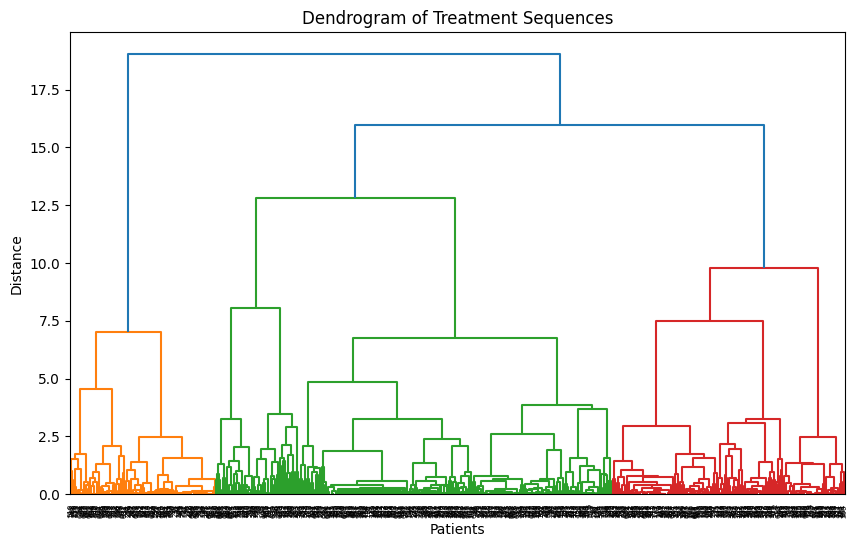

In [9]:
linkage_matrix = tca.hierarchical_clustering(distance_matrix)
tca.plot_dendrogram(linkage_matrix)

### plot heatmap with distance OM

c:\Users\ndiaga.dieng\Documents\TrajectoryClusteringAnalysis\venv\lib\site-packages\TrajectoryClusteringAnalysis\plotting.py:44: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sns.clustermap(data.drop(id_col, axis=1).replace(label_to_encoded),


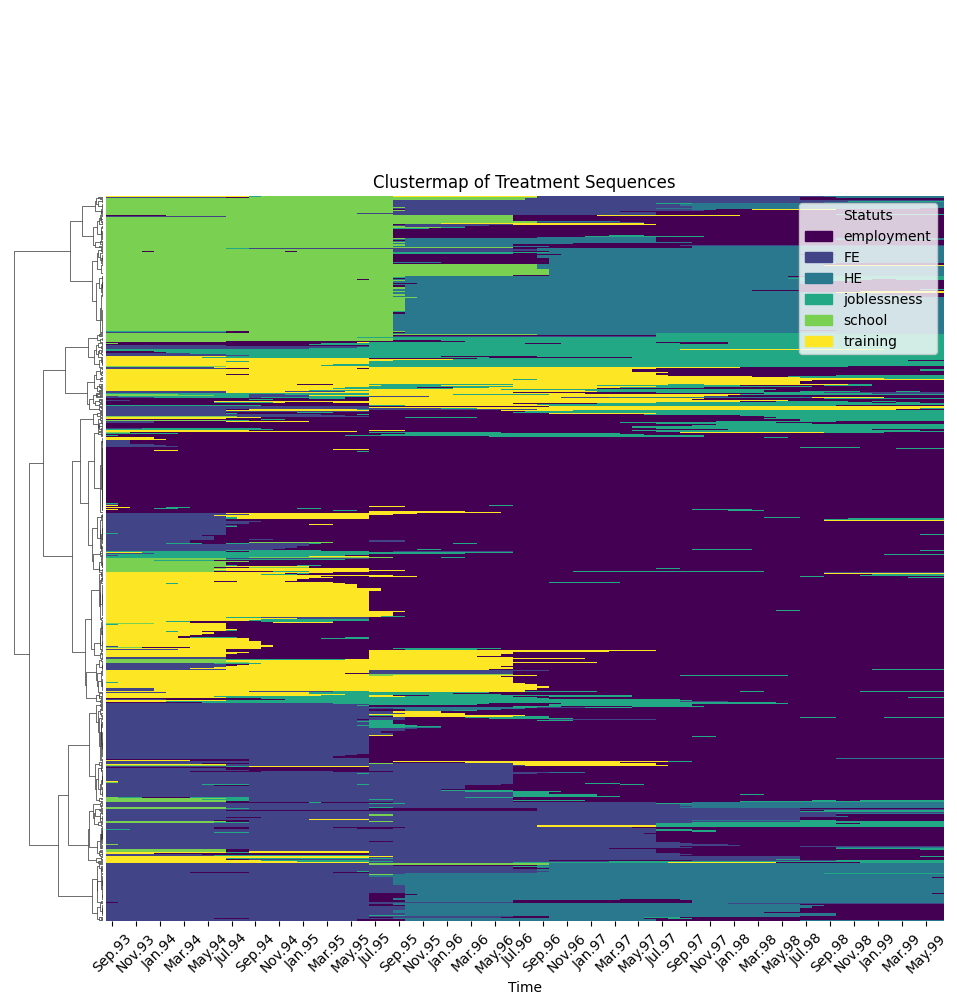

In [10]:
tca.plot_clustermap(linkage_matrix)

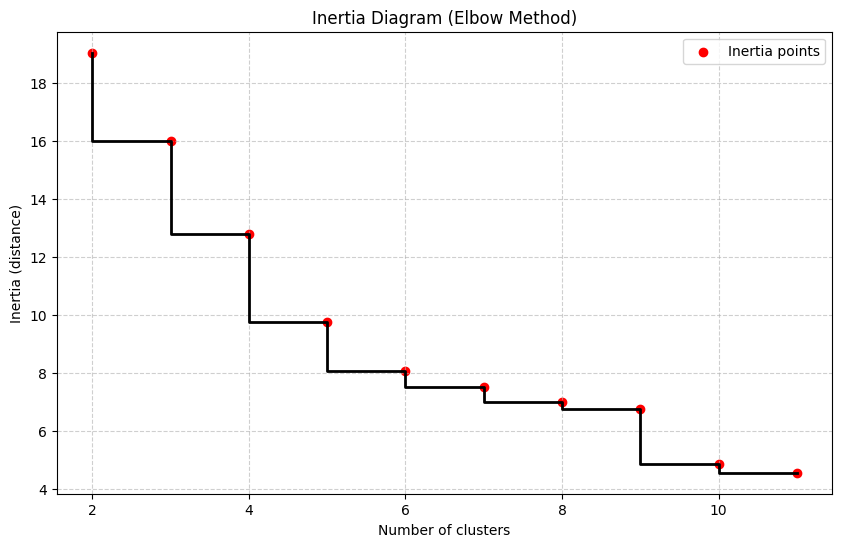

In [11]:
tca.plot_inertia(linkage_matrix)

c:\Users\ndiaga.dieng\Documents\TrajectoryClusteringAnalysis\venv\lib\site-packages\TrajectoryClusteringAnalysis\plotting.py:149: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heatmap_data = cluster_df[1].drop(id_col, axis=1).replace(label_to_encoded)
c:\Users\ndiaga.dieng\Documents\TrajectoryClusteringAnalysis\venv\lib\site-packages\TrajectoryClusteringAnalysis\plotting.py:149: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heatmap_data = cluster_df[1].drop(id_col, axis=1).replace(label_to_encoded)
c:\Users\ndiaga.dieng\Documents\

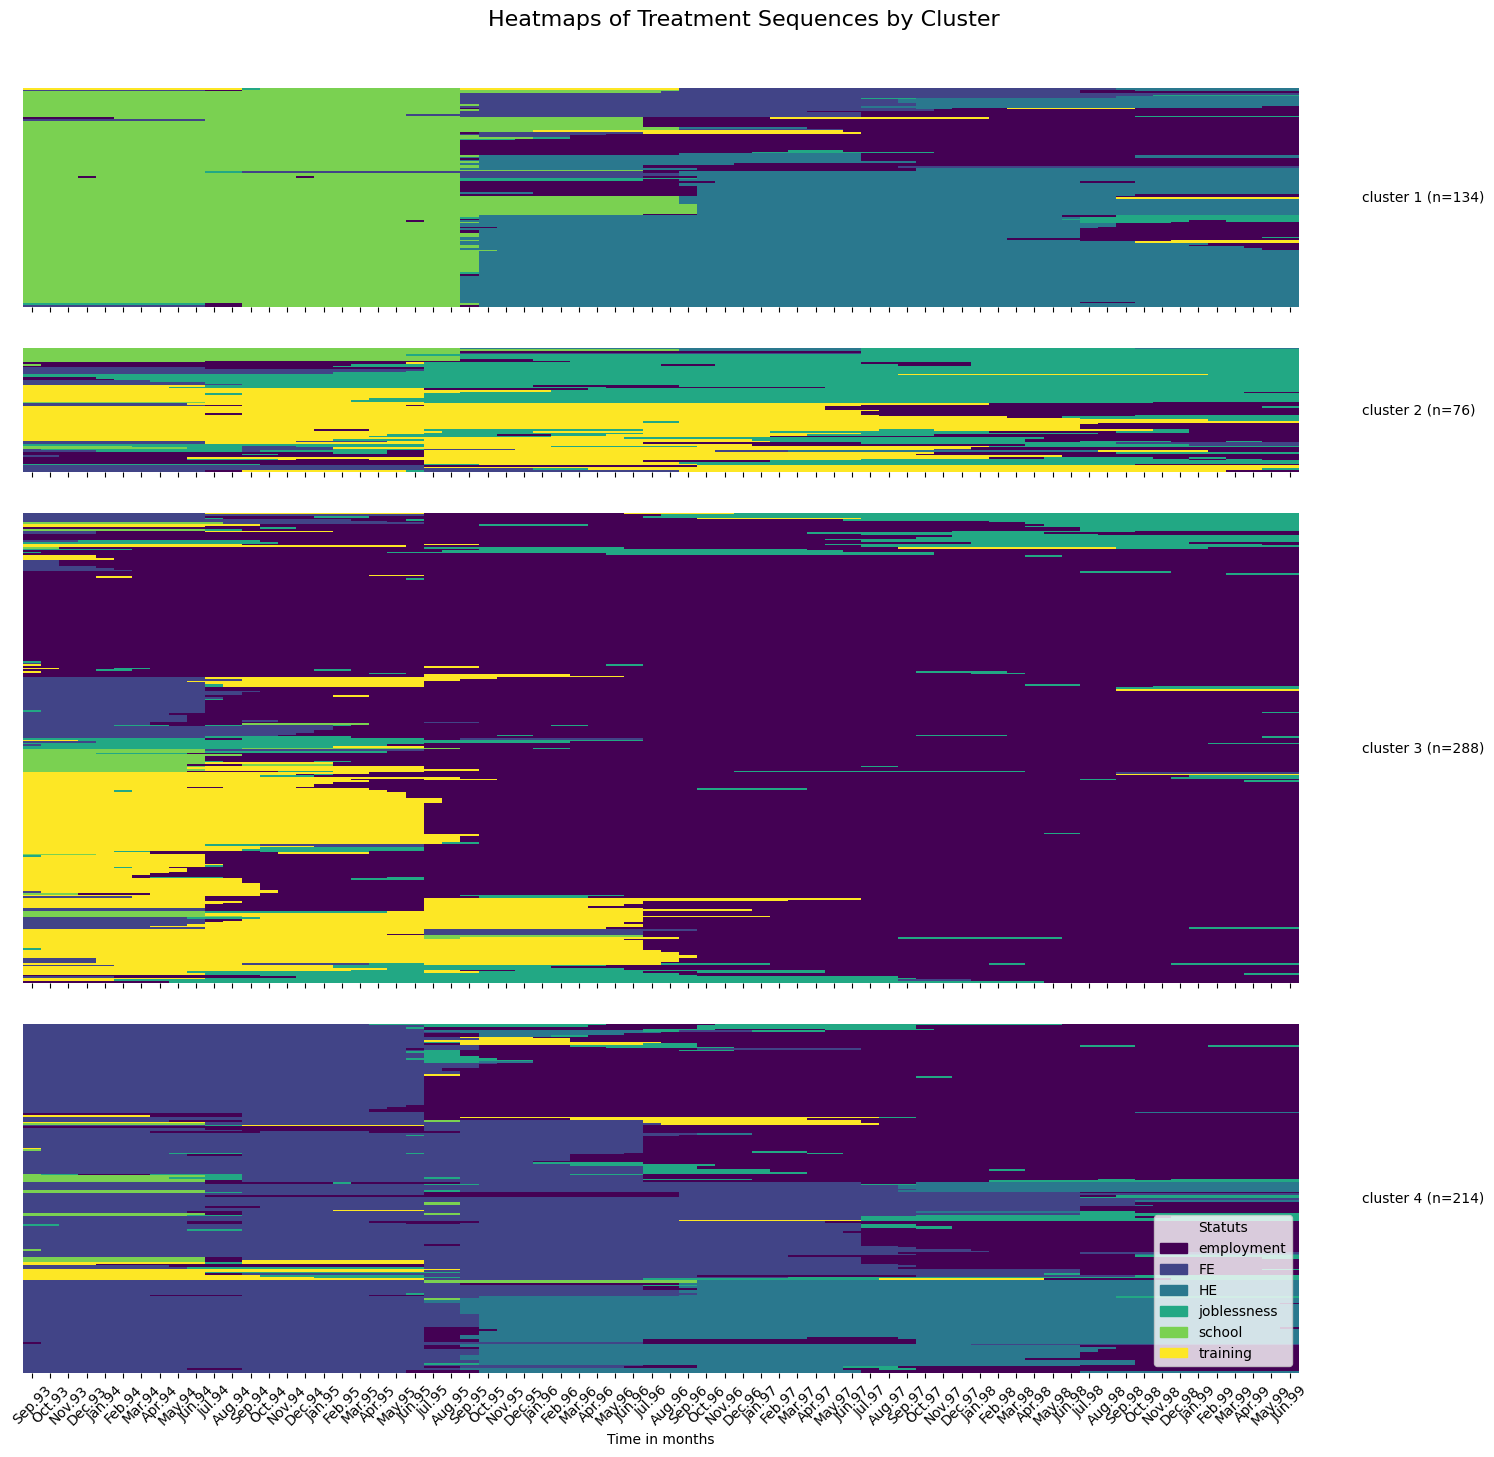

In [13]:
clusters = tca.assign_clusters(linkage_matrix, num_clusters=4)
    
tca.plot_cluster_heatmaps(clusters, sorted=False)

In [14]:
from sklearn.metrics import silhouette_score
silhouette_score(distance_matrix, clusters)

0.29425988751428495

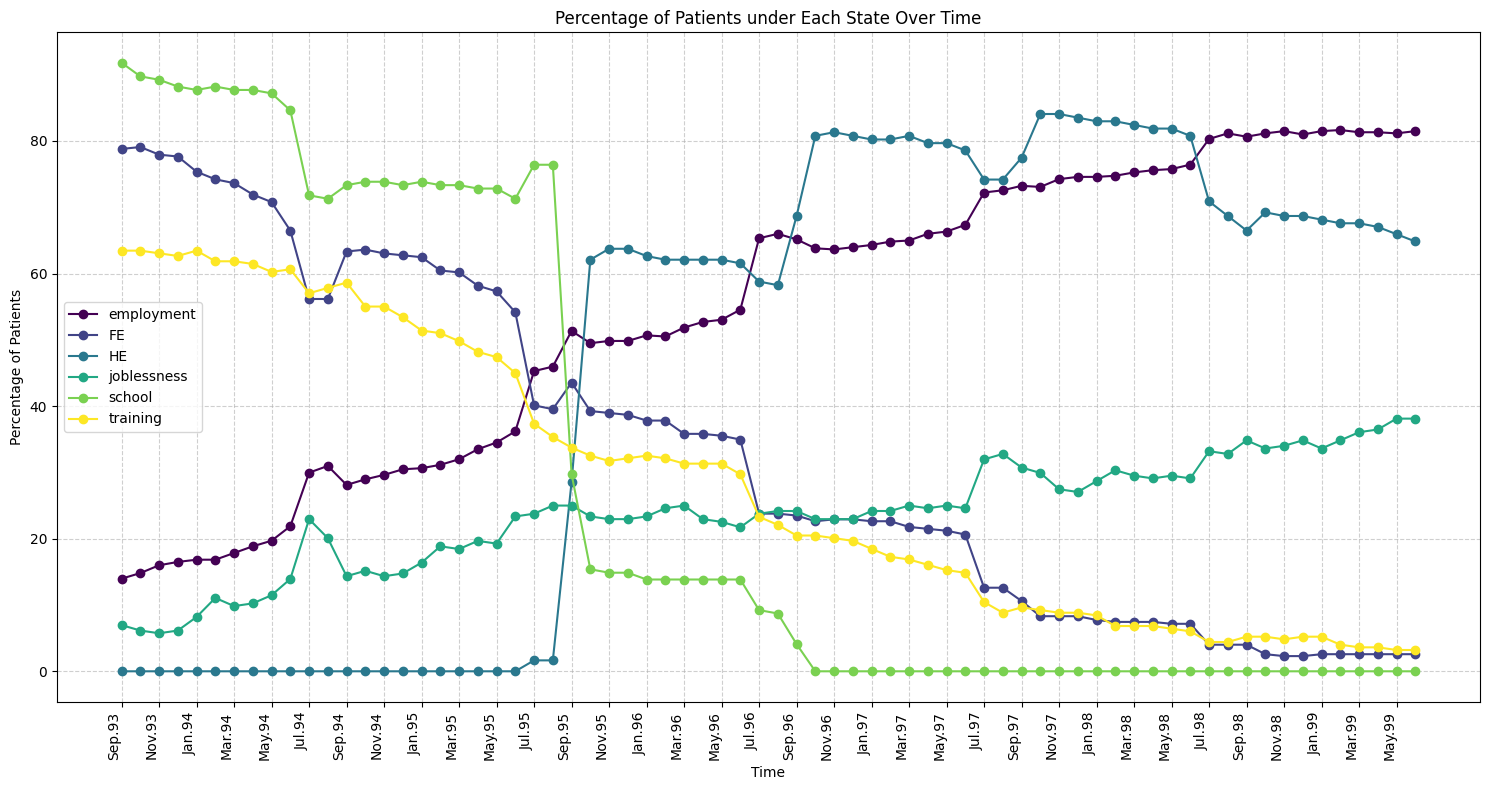

In [15]:
tca.plot_treatment_percentage()

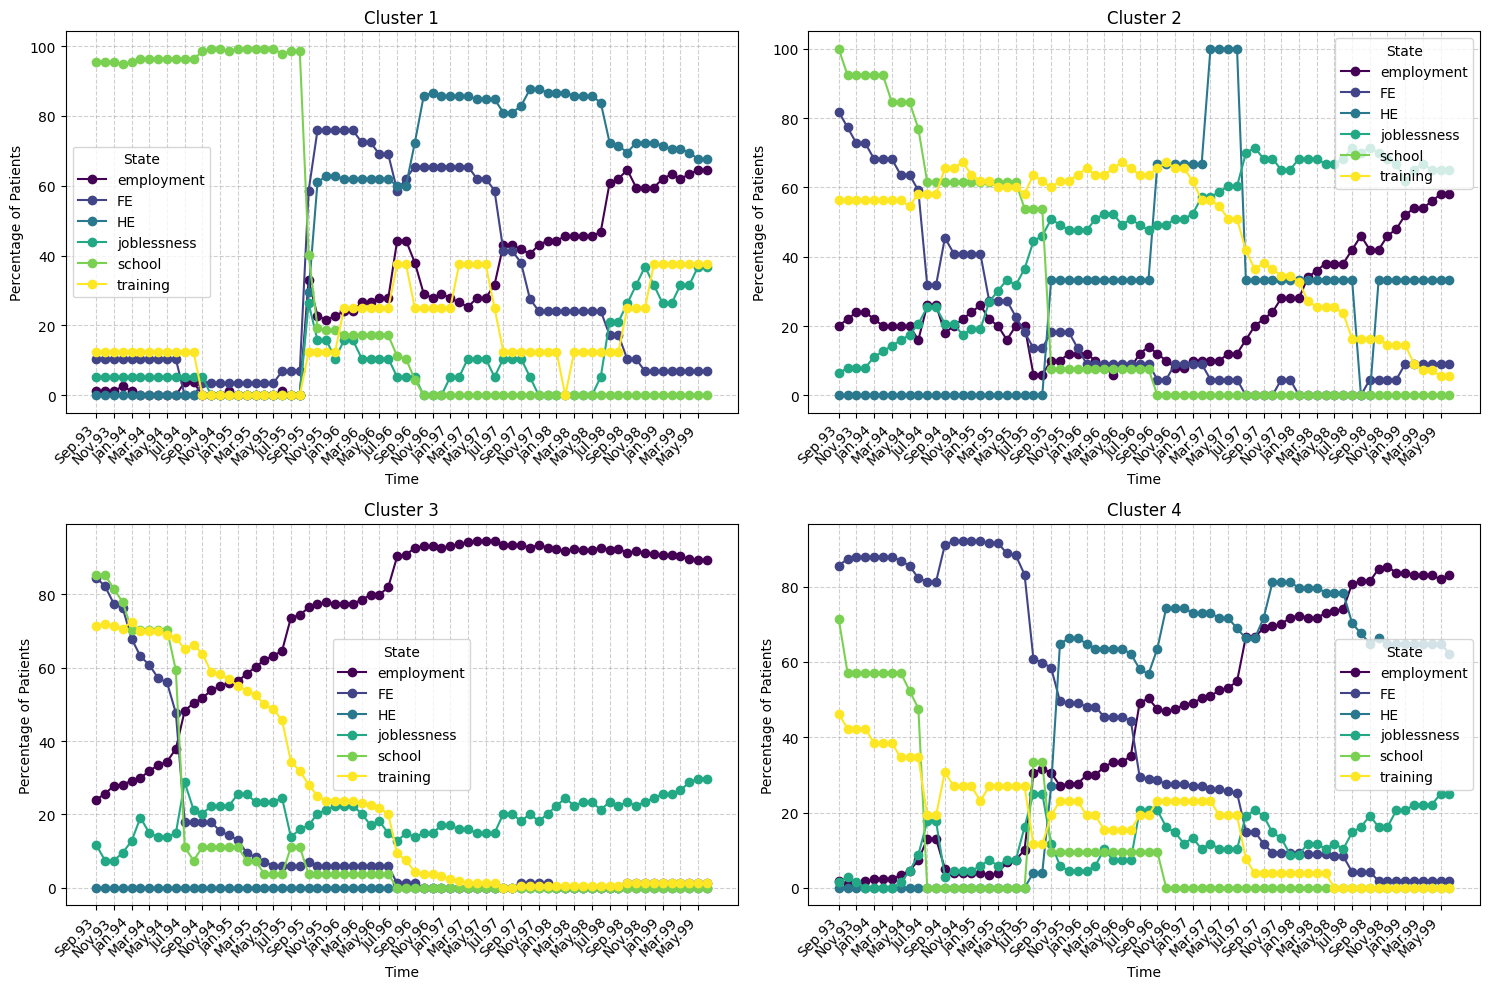

In [16]:
tca.plot_treatment_percentage(clusters=clusters)

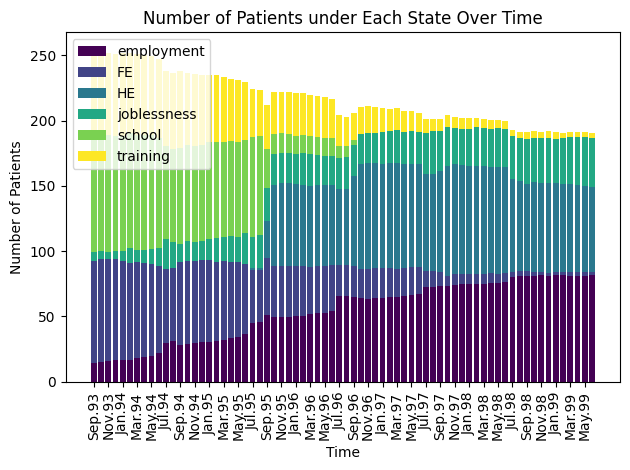

In [17]:

tca.bar_treatment_percentage()

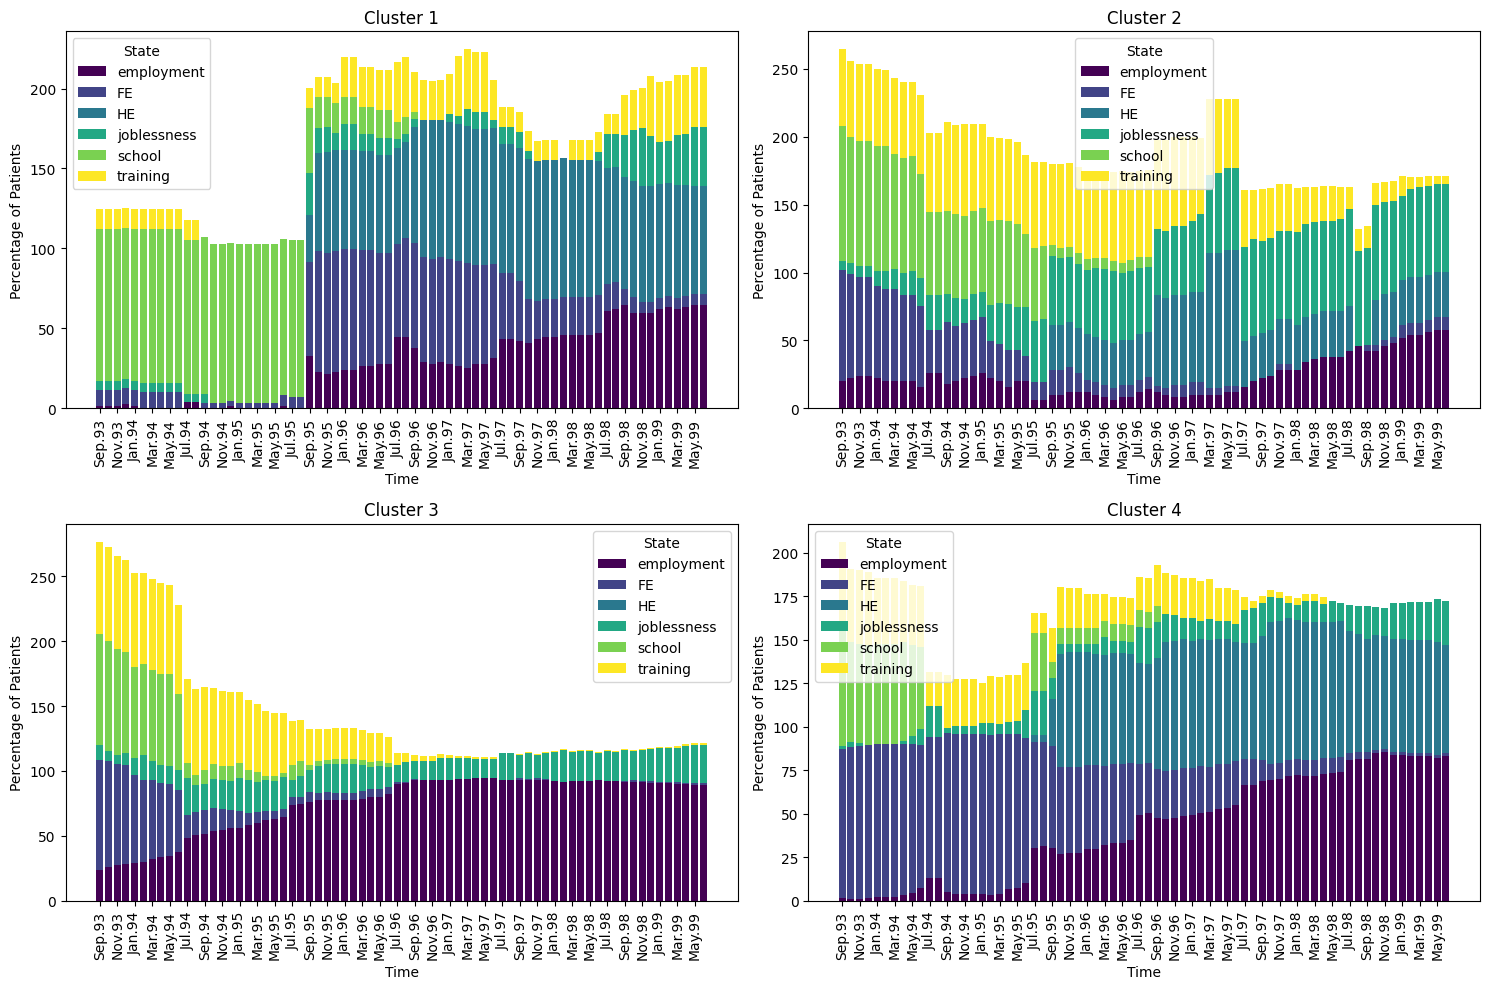

In [18]:
tca.bar_treatment_percentage(clusters=clusters)